In [1]:
import torch
import torch.nn as nn
import numpy as np

%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


## Binary classification case : is y(x) = 0 or 1 ?

#### Create Training Samples

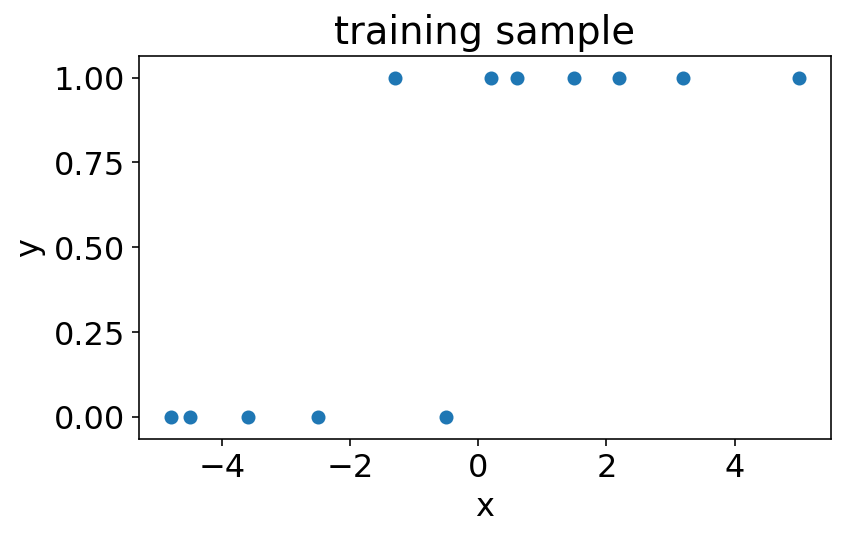

In [2]:
x = np.array([-4.8, -4.5, -3.6, -2.5, -1.3, -0.5, 0.2, 0.6, 1.5, 2.2, 3.2, 5.0])
y = np.array([ 0.0,  0.0,  0.0,  0.0,  1.0,  0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

#---------------

plt.rc('font', size=16)
fig, ax = plt.subplots(1, 1)

ax.scatter(x, y)

ax.set_title('training sample')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.tight_layout()

In [3]:
# torch tensor
X = torch.from_numpy(x.astype(np.float32))
Y = torch.from_numpy(y.astype(np.float32))

# turn training X and Y into the right shape = n_samples x n_features = 11 x 1
X = X.view(-1,1)
Y = Y.view(-1,1)

print("X.shape", X.shape)
print("Y.shape", Y.shape)

X.shape torch.Size([12, 1])
Y.shape torch.Size([12, 1])


#### Model | loss function | optimizer

In [4]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        '''logistic function
            p(X) = exp(w0+w1*x) / ( 1+ exp(w0+w1*x) )
        '''
        out = self.linear(x)
        y = torch.exp(out) / (1.+torch.exp(out))
        return y

model = LogisticRegression(input_dim=1, output_dim=1)

In [5]:
def binary_cross_entropy(y_predict, y_actual):        
    loss = - ( y_actual*torch.log(y_predict) + (1.-y_actual)*torch.log(1.-y_predict) ).mean()
    return loss

BCELoss = nn.BCELoss()

In [6]:
learning_rate = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Training loop

In [7]:
num_epochs = 500

for epoch in range(num_epochs):
    
    # forward pass
    Y_predict = model(X)
    
    # loss
        # my own loss function
    loss = binary_cross_entropy(Y_predict, Y)
        # c.p. to BSELoss in pytorch (torch.nn.BCELoss())
    loss_torch = BCELoss(Y_predict, Y).detach()
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 50 == 0 :
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}, nn.BCELoss={loss_torch.item():.4f}')

epoch: 50, loss=0.3777, nn.BCELoss=0.3777
epoch: 100, loss=0.3610, nn.BCELoss=0.3610
epoch: 150, loss=0.3477, nn.BCELoss=0.3477
epoch: 200, loss=0.3368, nn.BCELoss=0.3368
epoch: 250, loss=0.3277, nn.BCELoss=0.3277
epoch: 300, loss=0.3198, nn.BCELoss=0.3198
epoch: 350, loss=0.3129, nn.BCELoss=0.3129
epoch: 400, loss=0.3068, nn.BCELoss=0.3068
epoch: 450, loss=0.3013, nn.BCELoss=0.3013
epoch: 500, loss=0.2964, nn.BCELoss=0.2964


### check training result

In [8]:
x_test = np.linspace(-5, 5, 100).astype(np.float32)
X_test = torch.from_numpy(x_test).view(-1, 1)
print(X_test.shape)

with torch.no_grad():
    Y_predict_test = model(X_test)
    y_predict_test = Y_predict_test.numpy().reshape((len(x_test),))

torch.Size([100, 1])


In [9]:
def extract_weights(model):
    '''extract model parameters'''
    weights = []
    for par in model.parameters():
        wi = par.data.numpy().flatten()
        weights.append(wi[0])
    return weights


def logistic_function(weights, x):
    '''logistic function
        (to check whether the weights extracted from a trained model make sense)
    '''
    y = weights[0]*x + weights[1]
    y = np.exp(y) / (1.+np.exp(y))
    return y

weights = extract_weights(model)
y_fit = logistic_function(weights, x_test)

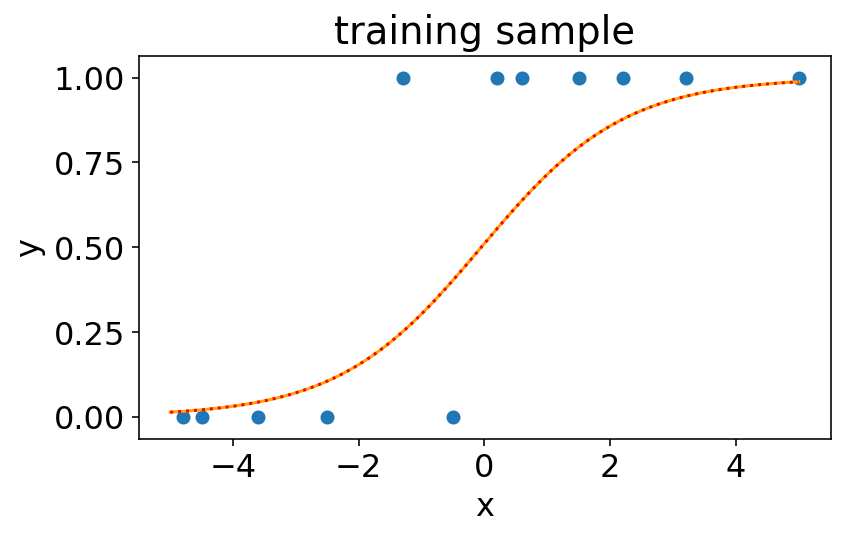

In [10]:
plt.rc('font', size=16)
fig, ax = plt.subplots(1, 1)

ax.scatter(x, y)
ax.plot(x_test, Y_predict_test, color='orange')
ax.plot(x_test, y_fit, color='r', ls=':')

ax.set_title('training sample')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.tight_layout()